In [2]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist


In [4]:
model_path = '/content/drive/MyDrive/models/fashion_mnist_model.h5'
model = load_model(model_path)


In [5]:
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_test = x_test.astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1)  # Reshape for the model


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
num_images = 20
random_indices = np.random.choice(len(x_test), num_images, replace=False)
x_sample = x_test[random_indices]
y_sample = y_test[random_indices]


In [7]:
predictions = model.predict(x_sample)
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


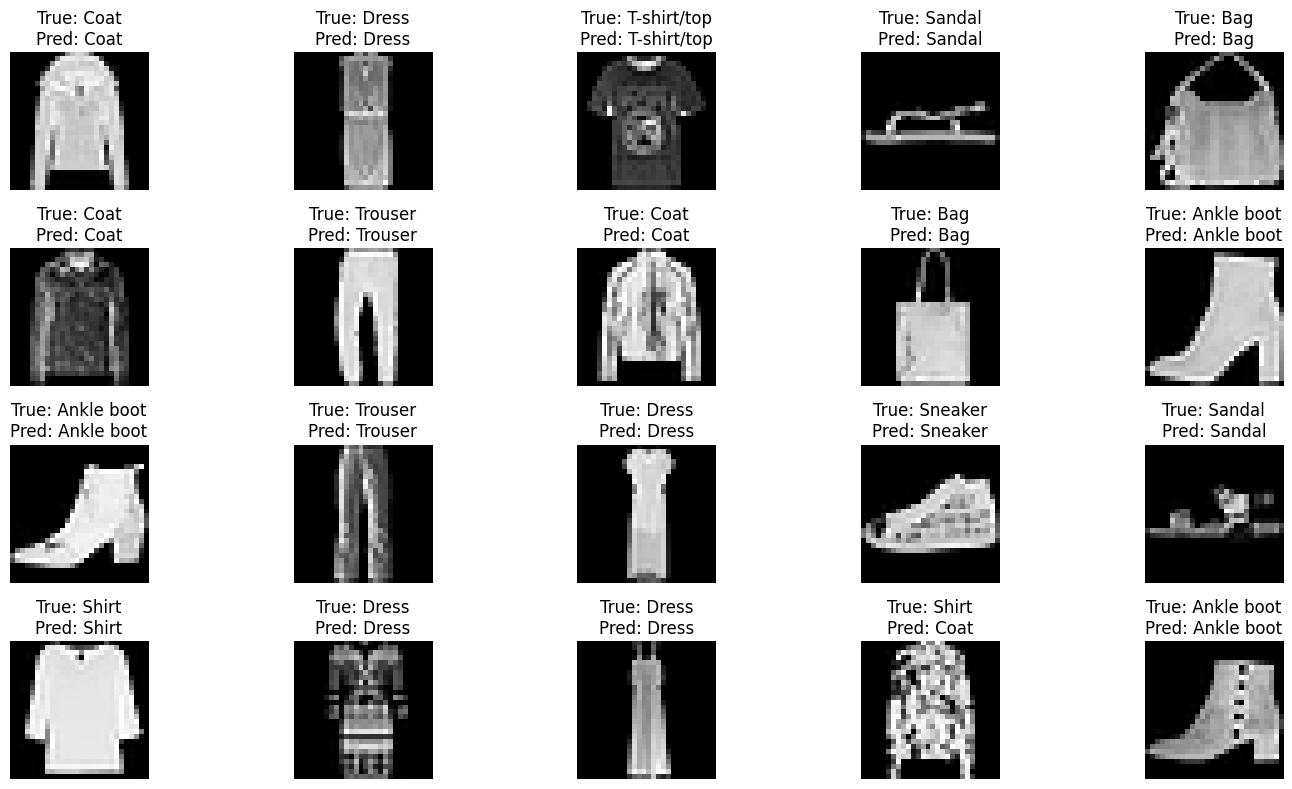

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_sample[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_sample[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
